In [1]:
load_ext rpy2.ipython

ModuleNotFoundError: No module named 'rpy2'

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("Rgraphviz")
BiocManager::install("bnlearn")


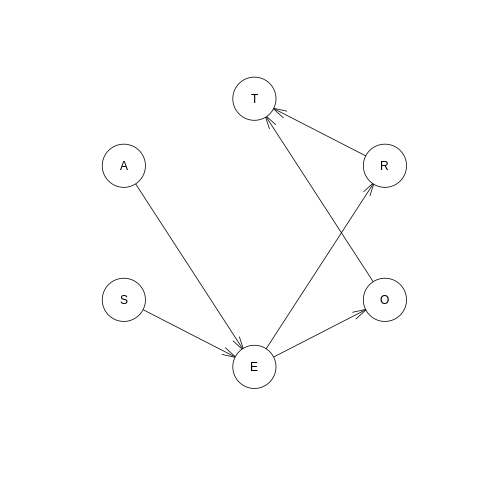

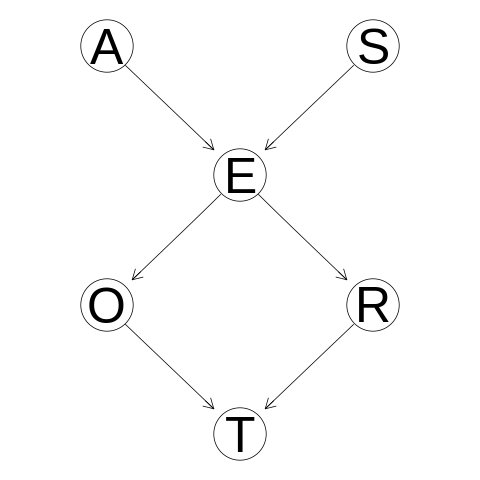

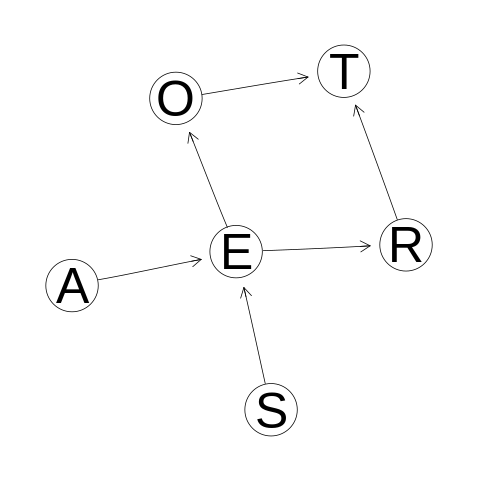

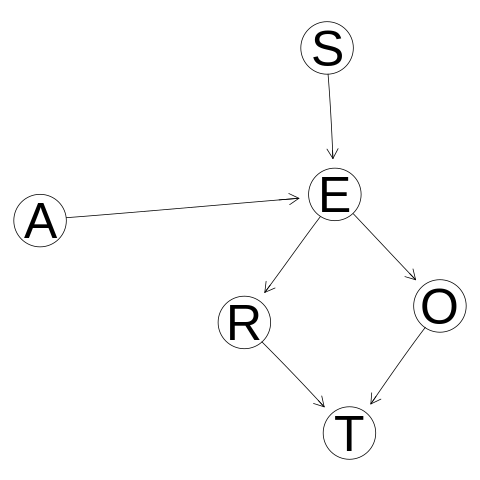

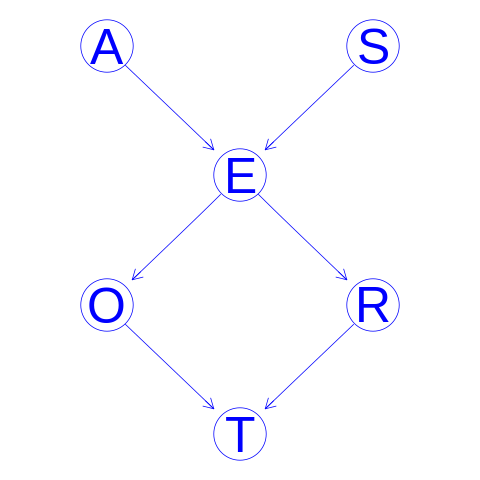

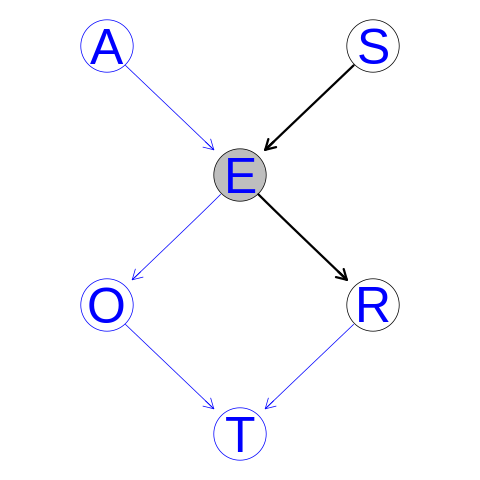

In [28]:
%%R
library(bnlearn)
library(Rgraphviz)
dag <- empty.graph(nodes = c("A","S","E","O","R","T"))
arc.set <- matrix(c("A", "E",
                    "S", "E",
                    "E", "O",
                    "E", "R",
                    "O", "T",
                    "R", "T"),
                  byrow = TRUE, ncol = 2,
                  dimnames = list(NULL, c("from", "to")))
arcs(dag) <- arc.set
nodes(dag)
arcs(dag)

# plot dag with plot function
plot(dag)

# plot dag with graphviz.plot function. Default layout is dot
graphviz.plot(dag, layout = "dot")

# plot dag with graphviz.plot function. change layout to "fdp"
graphviz.plot(dag, layout = "fdp")

# plot dag with graphviz.plot function. change layout to "circo"
graphviz.plot(dag, layout = "circo")

hlight <- list(nodes = nodes(dag), arcs = arcs(dag),
               col = "blue", textCol = "blue")
pp <- graphviz.plot(dag, highlight = hlight)

edgeRenderInfo(pp) <- list(col = c("S~E" = "black", "E~R" = "black"),
                           lwd = c("S~E" = 3, "E~R" = 3))

nodeRenderInfo(pp) <- list(col = c("S" = "black", "E" = "black", "R" = "black"),
                           fill = c("E" = "grey"))

renderGraph(pp)
